<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Green; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Banking Churn Analysis & Modeling.</p></div>

<div align="center">
  <img src="https://m.economictimes.com/thumb/msid-100281493,width-1200,height-900,resizemode-4,imgsize-14062/banks-request-rbi-for-more-time-for-new-loan-provisioning-system.jpg" alt="Image Description" width="300" height="200">
</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Business Objective:</font></h3>
   
- The goal would be to identify which customers are most likely to churn (leave the service) and understand the key factors driving their decision to leave. `Churn Reduction through Predictive Analytics`
- Churn refers to the process by which a customer stops doing business with a company.

<h3 align="left"><font color=brown>📊 Business Value:</font></h3>
- Customer retention is critical for a bank’s profitability. Predicting which customers are likely to churn can help the bank take proactive steps (e.g., offering personalized services or incentives) to retain valuable customers.

## **Import Needded Columns**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

## **Data Representation**

In [3]:
# Read data
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* **RowNumber**: Index of the row.
* **CustomerId**: Unique identifier for each customer.
* **Surname**: Customer's last name (may not be very useful for analysis).
* **CreditScore**: The credit score of the customer [300 : 850].
    - Poor credit: 300 to 579.
    - Fair credit: 580 to 669.
    - Good credit: 670 to 739.
    - Very good credit: 740 to 799.
    - Excellent credit: 800 to 850.
* **Geography**: Country of the customer (e.g., France, Spain).
* **Gender**: Gender of the customer (e.g., Male, Female).
* **Age**: Age of the customer.
* **Tenure**: Number of years the customer has been with the bank.
* **Balance**: Account balance of the customer.
* **NumOfProducts**: Number of products the customer has purchased.
* **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).
* **IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).
* **EstimatedSalary**: Estimated annual salary of the customer.
* **Exited**: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **Data Wrangling**

**Check Duplicated Values**

In [6]:
df.duplicated().sum()

0

**Check Missing Values**

In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check Outliers Values**

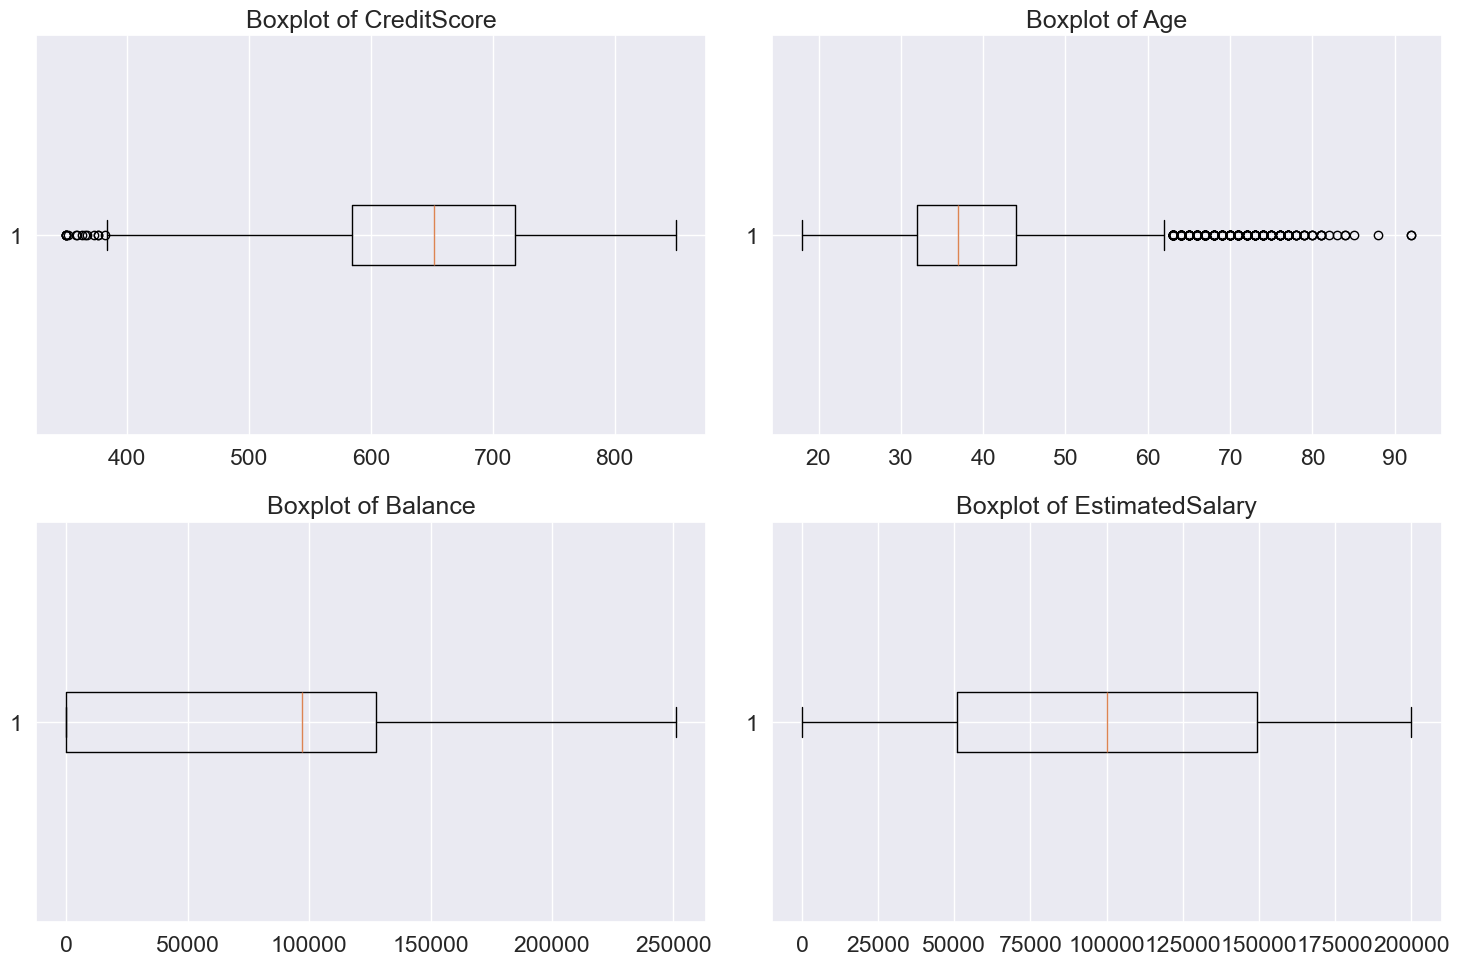

In [8]:
# Features to check for outliers
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create box plots for each feature to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()

## **Exploratory Data Analysis**

- **The goal of EDA is to better understand the distributions of features, identify trends or patterns, and explore relationships between features and the target variable (Exited)**

#### **Univariate Analysis**

**CreditScore Column**

In [9]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

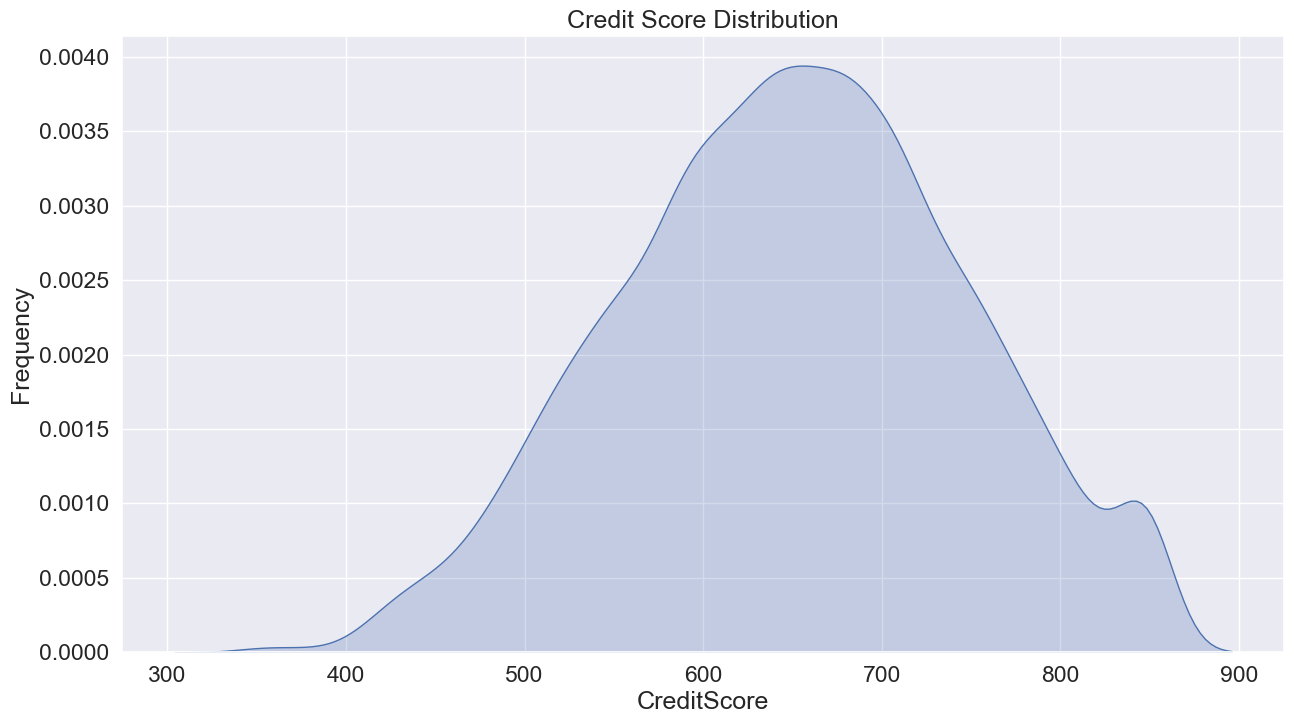

In [10]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

- The distribution of credit scores is slightly skewed to the right, meaning more customers have higher credit scores (closer to 800).
- This could indicate that most customers have a good credit history.

**Geography Column**

In [11]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

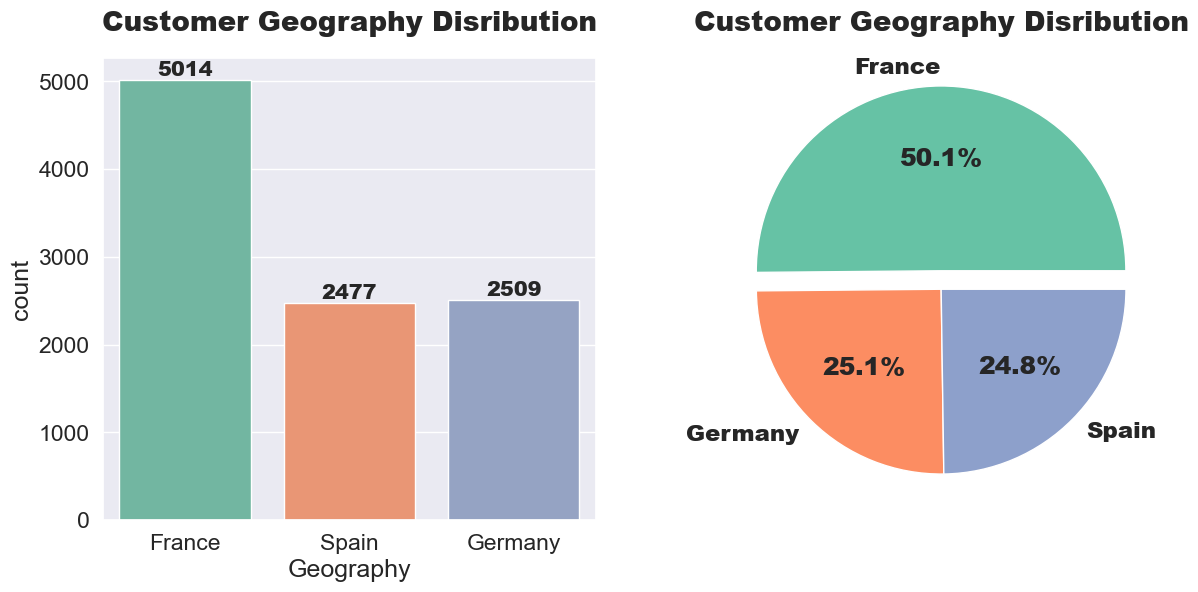

In [13]:
count = df["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0,0])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

**Gender Column**

In [14]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

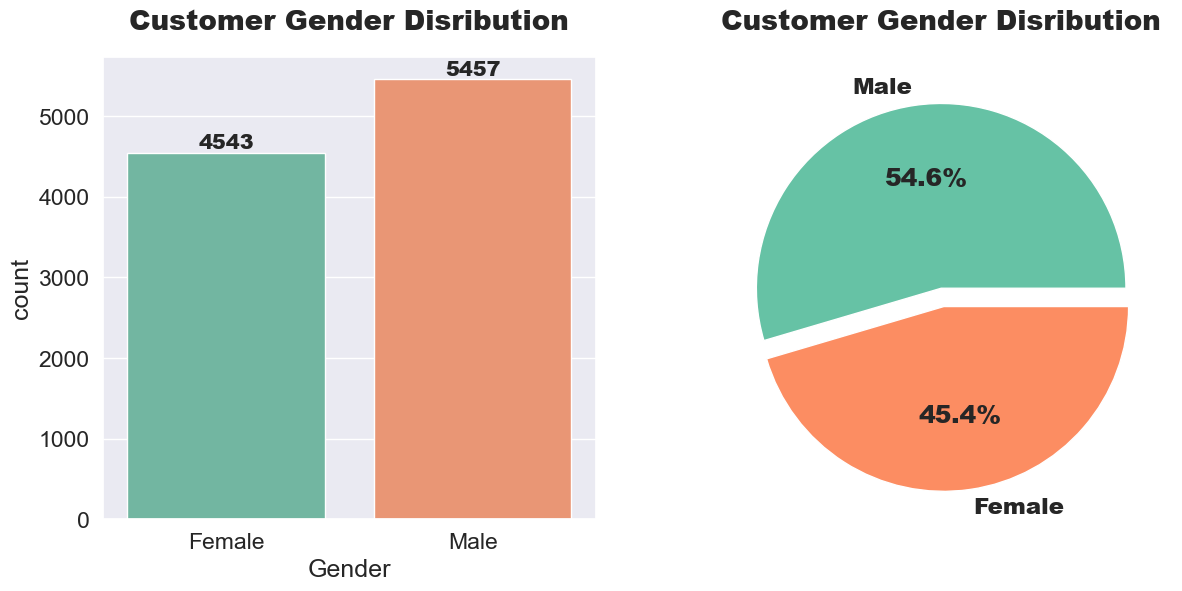

In [15]:
count = df["Gender"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

**Age Column**

In [16]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

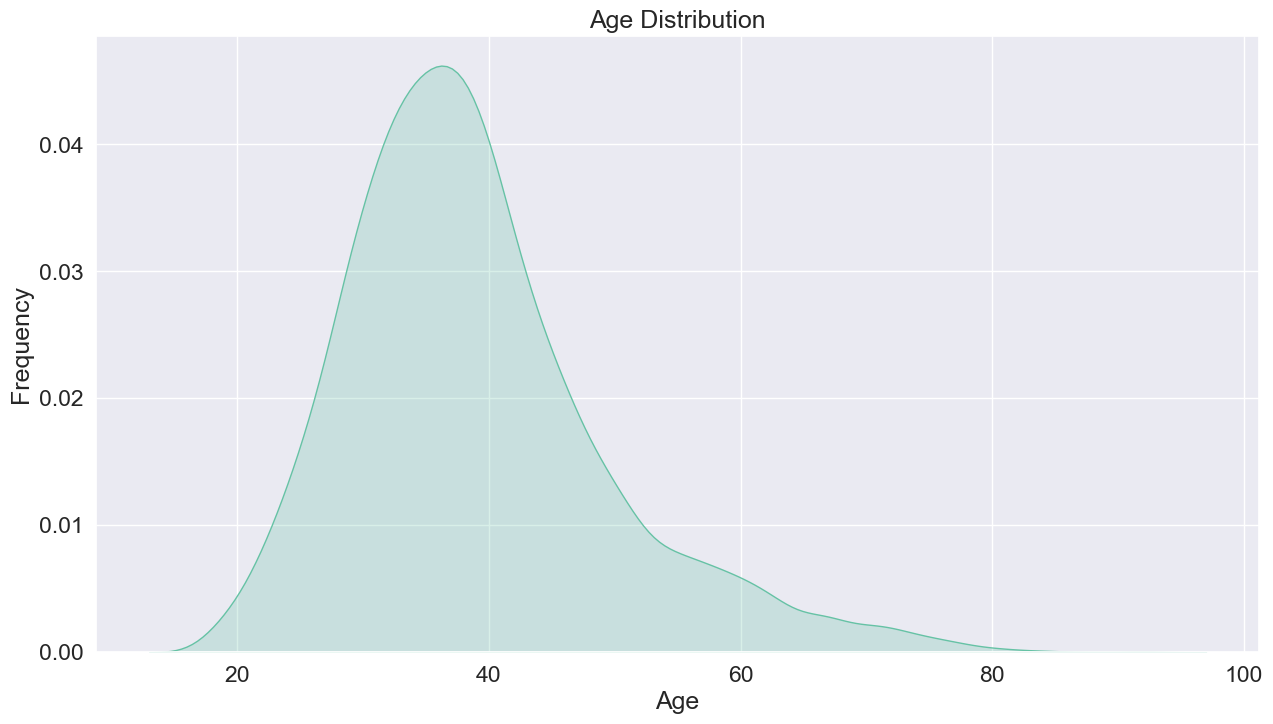

In [17]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

- The age distribution is concentrated around 30–50 years, with fewer customers in the older age range.
- This suggests that most customers are middle-aged, which might be relevant depending on the bank’s target demographic.

**Tenure Column**

In [18]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

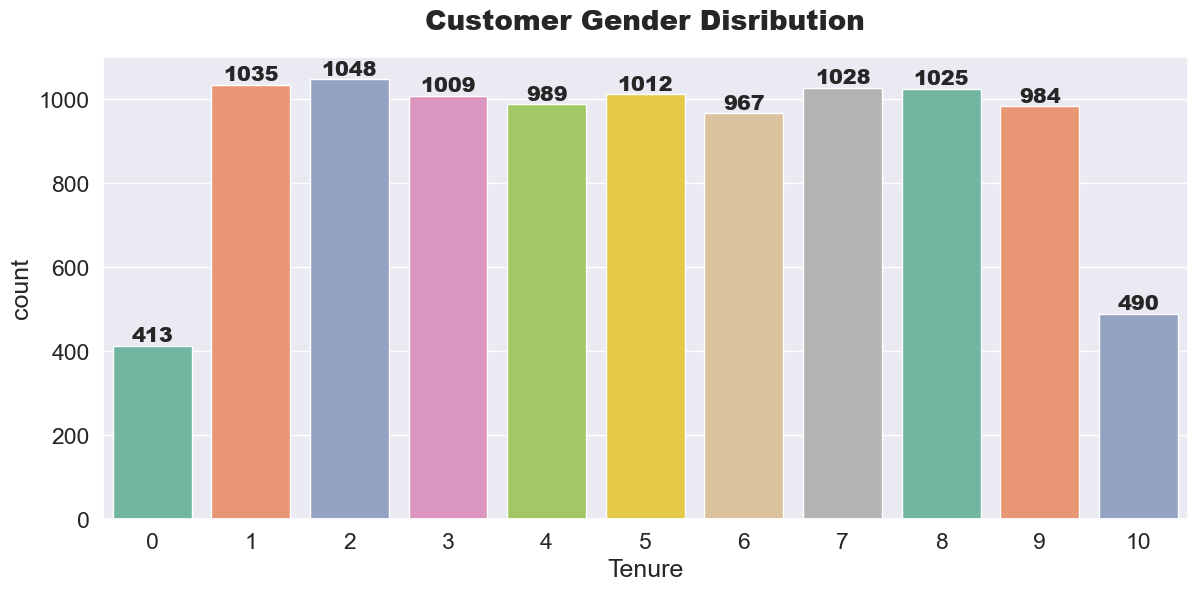

In [19]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

- The uniform distribution suggests that the bank has a balanced customer base across different tenure lengths.

**Balance Column**

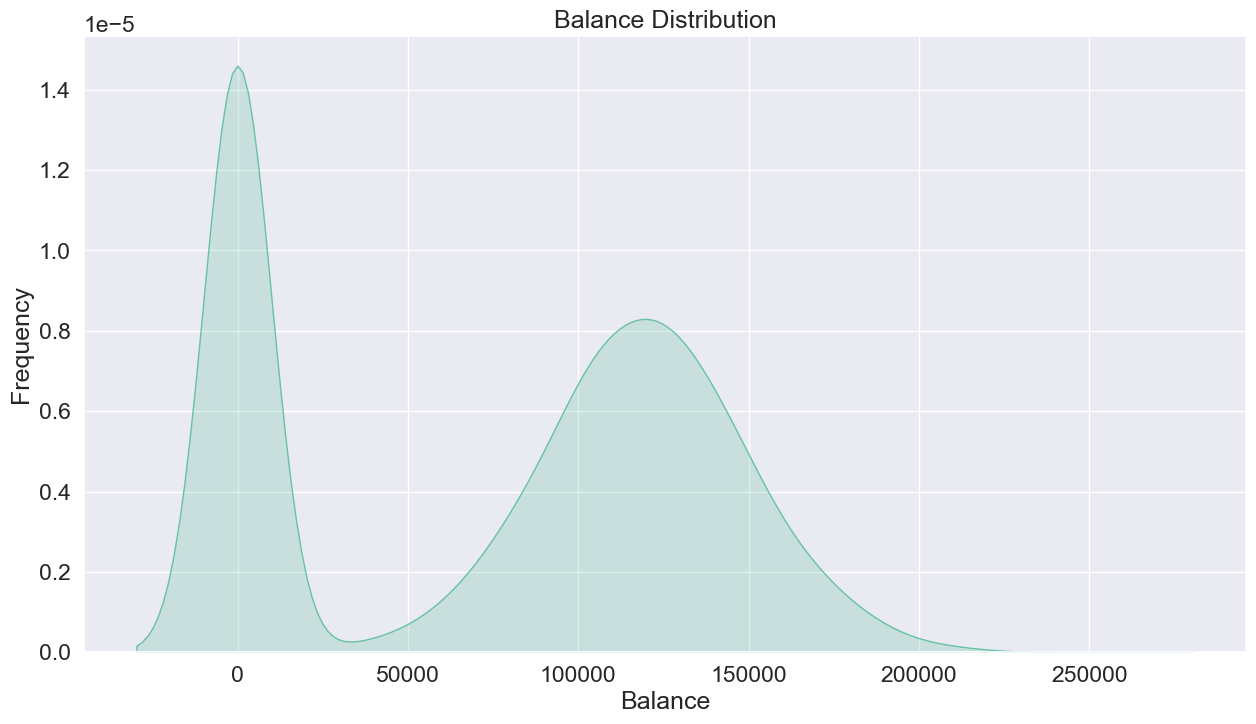

In [20]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

- A bimodal distribution in the Balance column suggests two distinct customer segments:
  - Low-balance customers who may be more likely to churn.
  - High-balance customers who are likely more engaged and loyal.

**NumOfProducts Column**

In [21]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

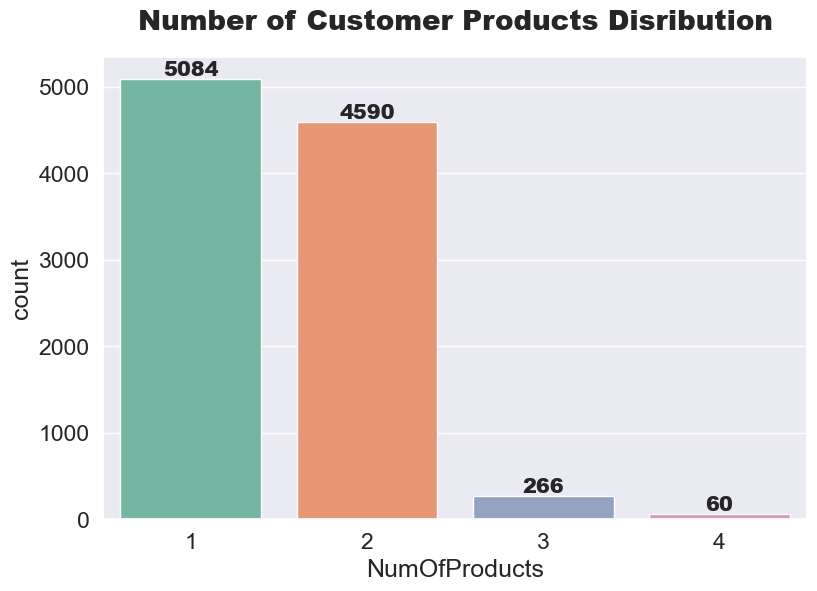

In [22]:
count = df["NumOfProducts"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

**HasCrCard Column**

In [23]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

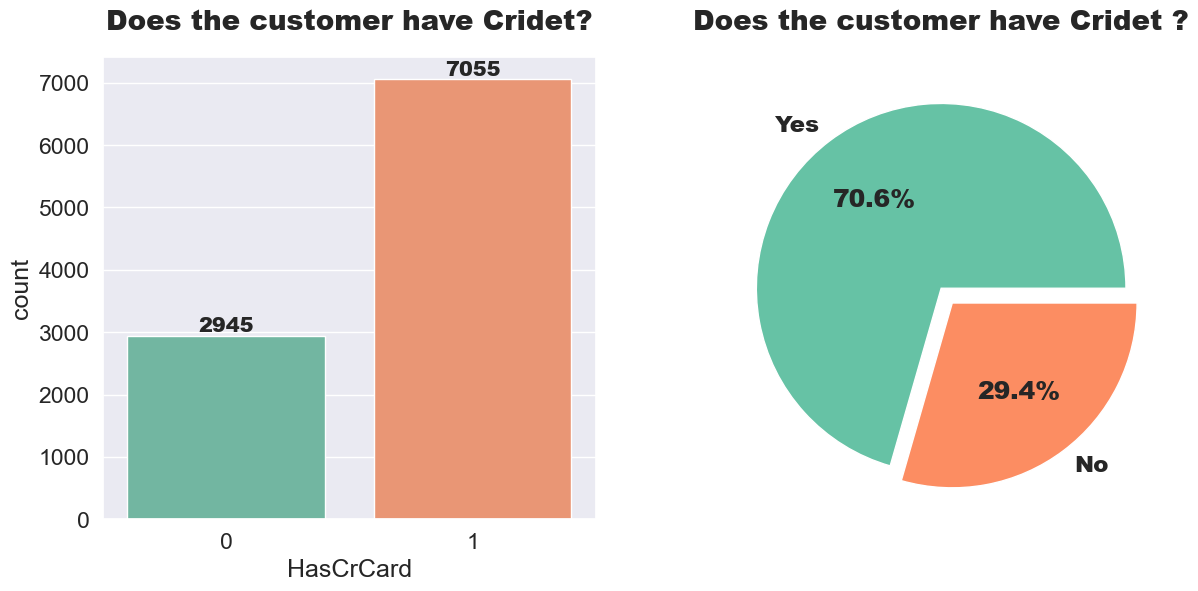

In [24]:
count = df["HasCrCard"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Does the customer have Cridet?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Does the customer have Cridet ?",fontweight="black",size=20,pad=20)
plt.show()

**IsActiveMember Column**

In [25]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

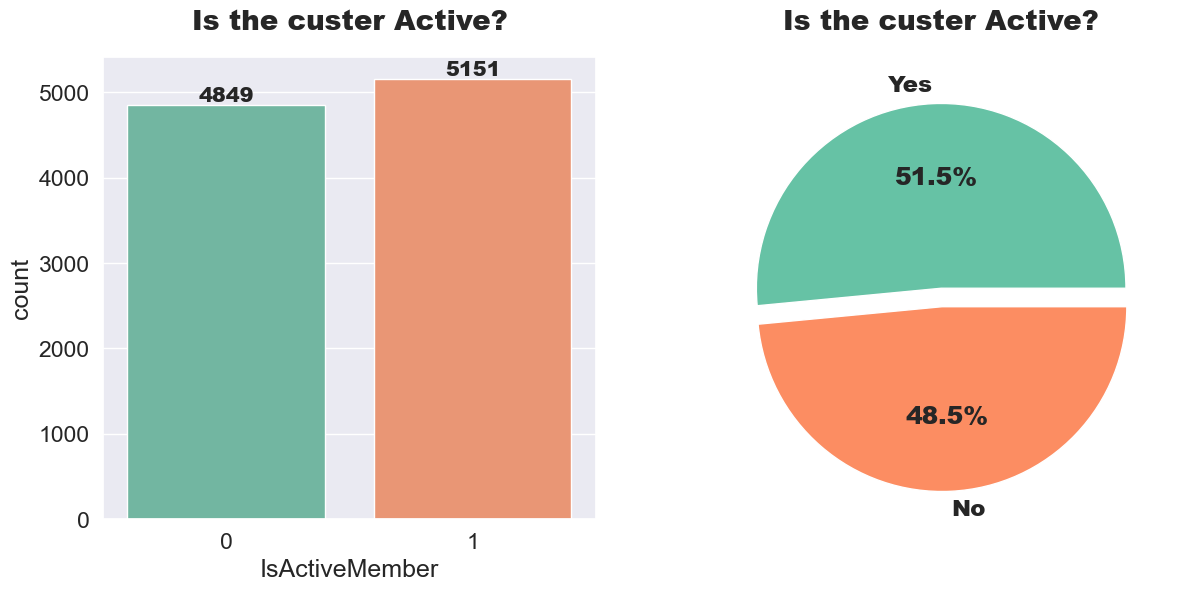

In [26]:
count = df["IsActiveMember"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)
plt.show()

In [27]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

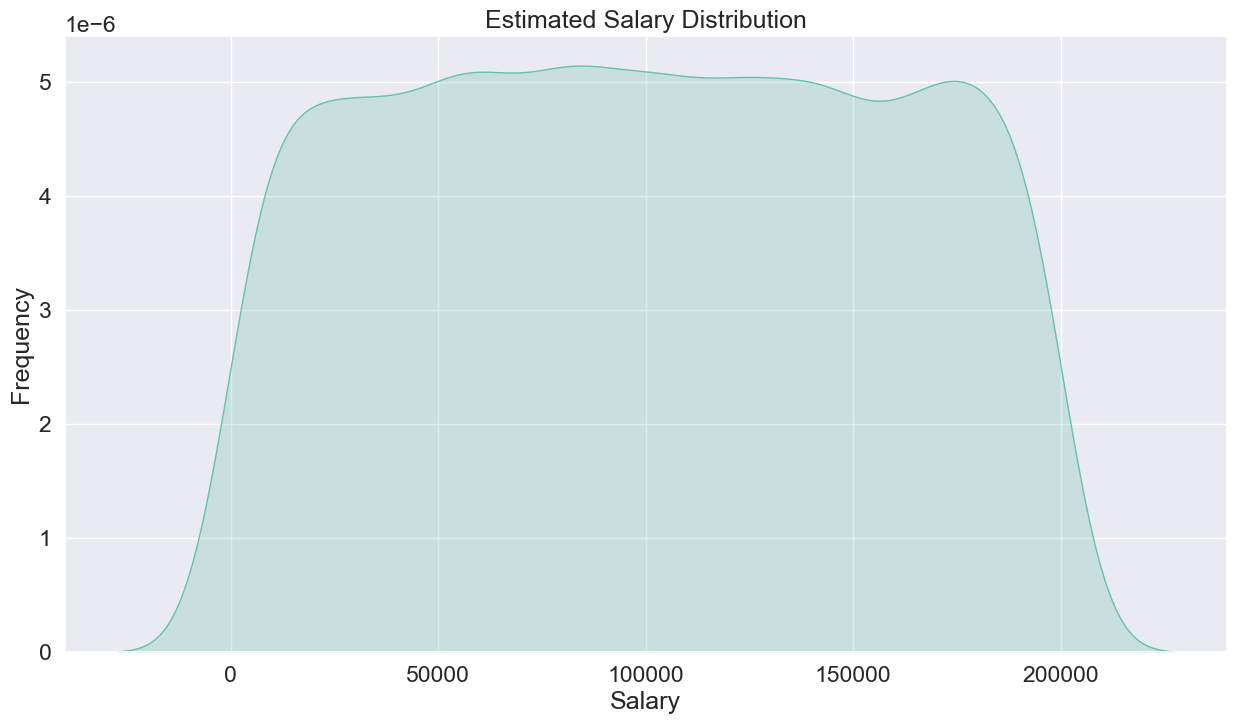

In [28]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

**Exited Column**

In [29]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

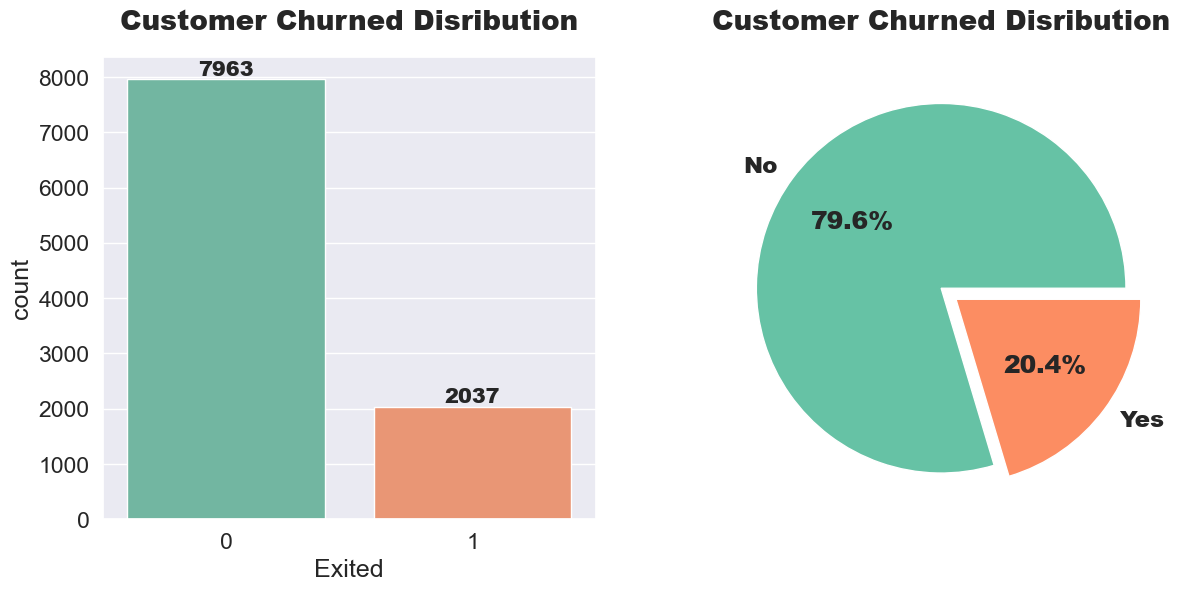

In [30]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Exited",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

#### **Bivariate Analysis**

**Numerical Features vs. Churn (Exited)**

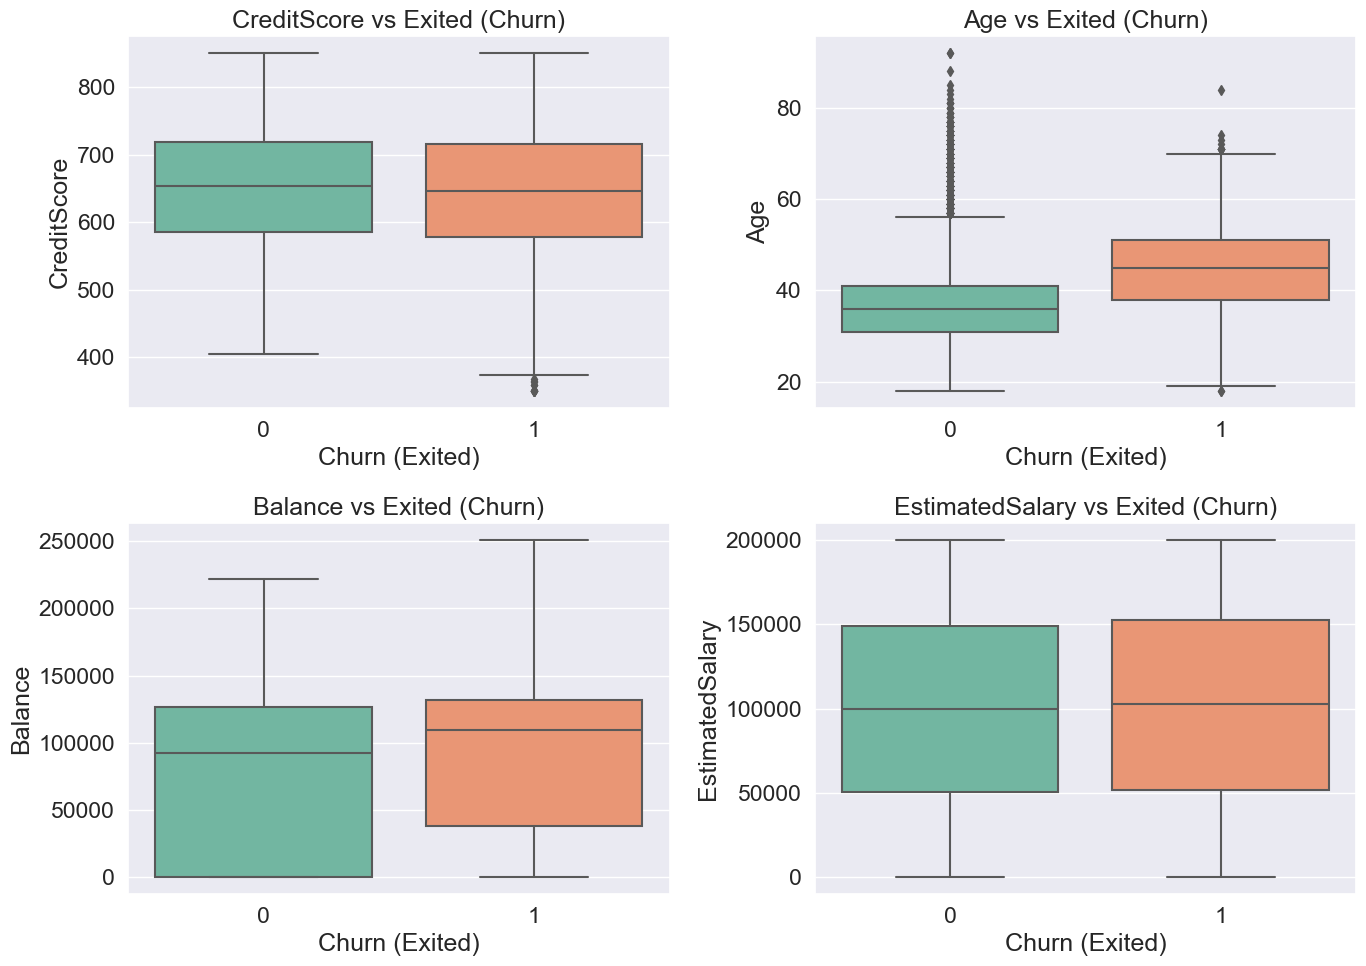

In [31]:
# List of numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


**Multivariate Analysis**

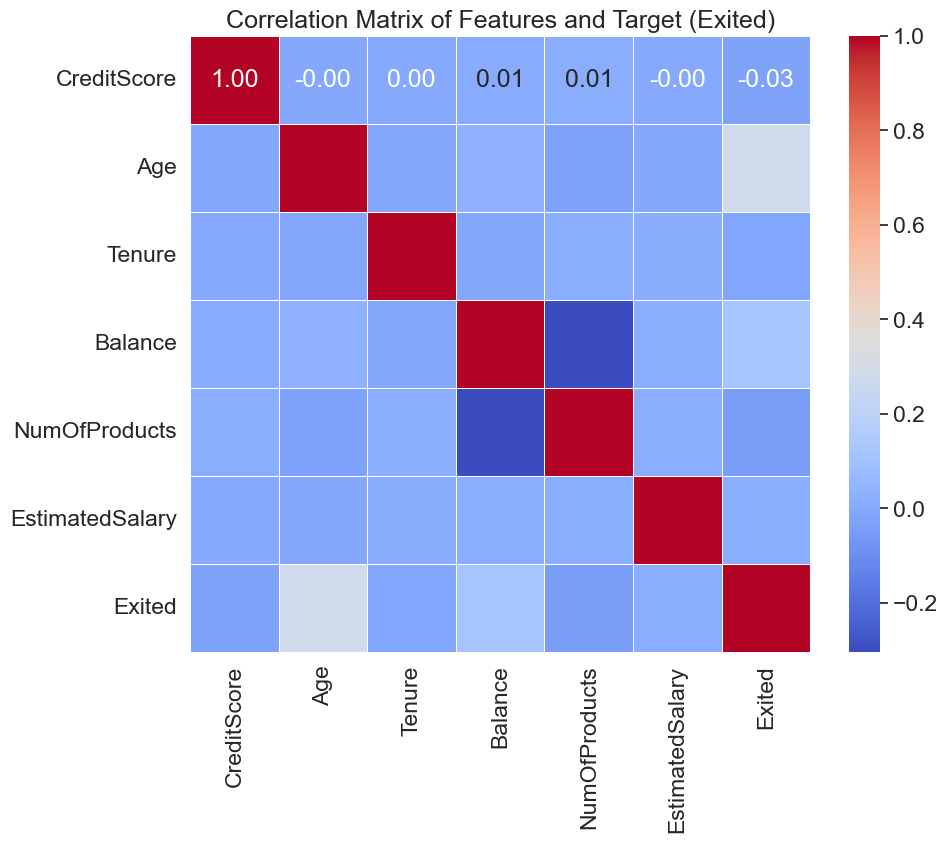

In [49]:
# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Compute the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

In [50]:
correlation_matrix = df[numerical_features_with_target].corr()
correlation_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000


## **Data Preprocessing**

**Drop Unneeded Columns**

In [52]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

**Define Features `X` and Target `y`**

In [53]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = y.astype("int")

**Data Encoding**

**To apply encoding to categorical columns in your dataset, the type of encoding will depend on whether the categorical variables are nominal (unordered) or ordinal (ordered)**

In [54]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [55]:
X = X.astype("int")

**Data Scaling**

In [56]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

**Data Splitting**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Machine Learning Models**

**Logistic Regression model**

In [58]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
# Train Score
print(lr.score(X_train, y_train))

0.811


In [60]:
# Test Score
print(lr.score(X_test, y_test))

0.8115


In [61]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [64]:
# Get our metrics
lr_acc = accuracy_score(y_test, y_pred)
lr_per = precision_score(y_test, y_pred)
lr_rec = recall_score(y_test, y_pred)

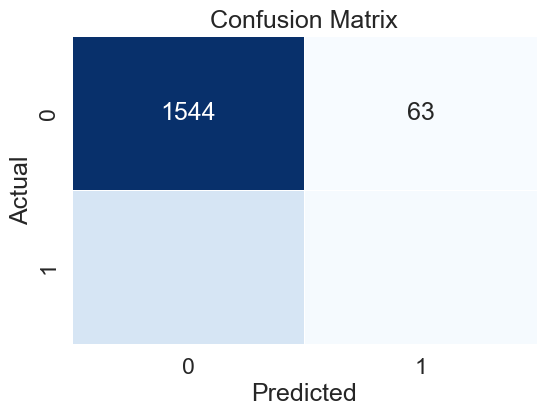

In [65]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVC Model**

In [67]:
# Define hyperparameter grid
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10]}

svm = SVC()

In [68]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [69]:
# Get best model
best_model = grid_search.best_estimator_
best_model

SVC(C=10)

In [70]:
# Train Score
print(best_model.score(X_train, y_train))

0.87925


In [71]:
# Test Score
print(best_model.score(X_test, y_test))

0.8825


In [72]:
y_pred = best_model.predict(X_test)

In [73]:
# Get our metrics
svc_acc = accuracy_score(y_test, y_pred)
svc_per = precision_score(y_test, y_pred)
svc_rec = recall_score(y_test, y_pred)

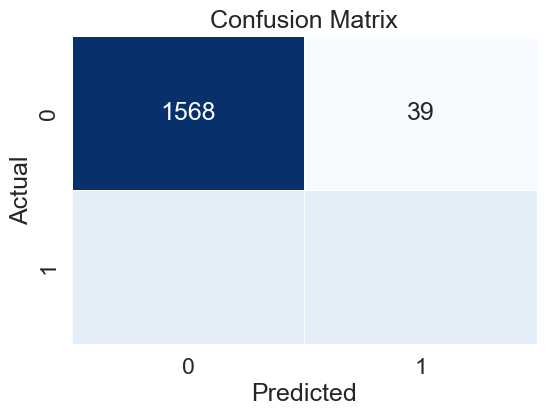

In [74]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**K-Neighbors Classifier**

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
print(knn.score(X_train, y_train))

0.896625


In [77]:
print(knn.score(X_test, y_test))

0.8365


In [78]:
y_pred = knn.predict(X_test)

In [79]:
# Get our metrics
knn_acc = accuracy_score(y_test, y_pred)
knn_per = precision_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)

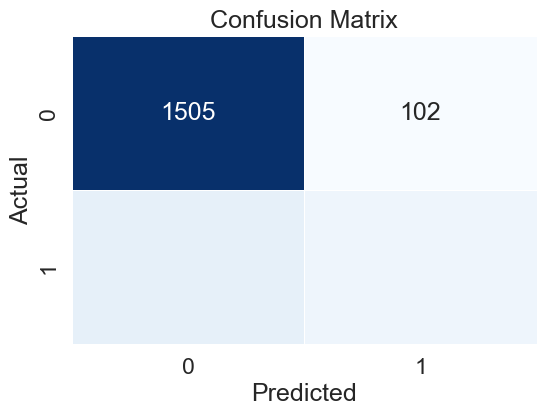

In [80]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree Classifier**

In [81]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

In [82]:
# Train Score
print(clf.score(X_train, y_train))

0.840125


In [83]:
# Test Score
print(clf.score(X_test, y_test))

0.844


In [84]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [85]:
# Get our metrics
clf_acc = accuracy_score(y_test, y_pred)
clf_per = precision_score(y_test, y_pred)
clf_rec = recall_score(y_test, y_pred)

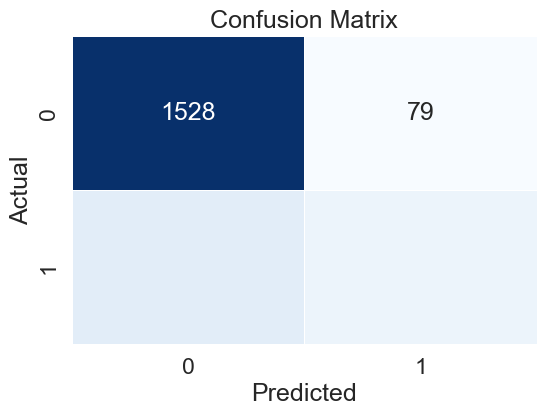

In [86]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**RandomForestClassifier Model**

In [87]:
RF_classifier = RandomForestClassifier(n_estimators=100,max_depth = 8)

RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [88]:
# Train score
RF_classifier.score(X_train, y_train)

0.882125

In [89]:
# Test score
RF_classifier.score(X_test, y_test)

0.861

In [90]:
# Get prediction
y_pred = RF_classifier.predict(X_test)

In [91]:
# Get our metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_per = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)

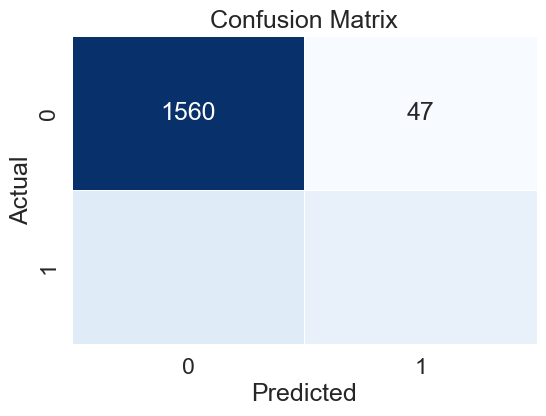

In [92]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Bagging Classifier**

In [93]:
# Create a base decision tree classifier
base_classifier =  SVC(C=10)

# Create a bagging classifier with decision trees
bagged_classifier = BaggingClassifier(base_classifier, n_estimators=20)

# Train the bagged classifier on your data
bagged_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(C=10), n_estimators=20)

In [94]:
bagged_classifier.score(X_train, y_train)

0.885625

In [95]:
bagged_classifier.score(X_test, y_test)

0.865

In [96]:
# Make predictions
y_pred = bagged_classifier.predict(X_test)

In [97]:
# Get our metrics
bag_acc = accuracy_score(y_test, y_pred)
bag_per = precision_score(y_test, y_pred)
bag_rec = recall_score(y_test, y_pred)

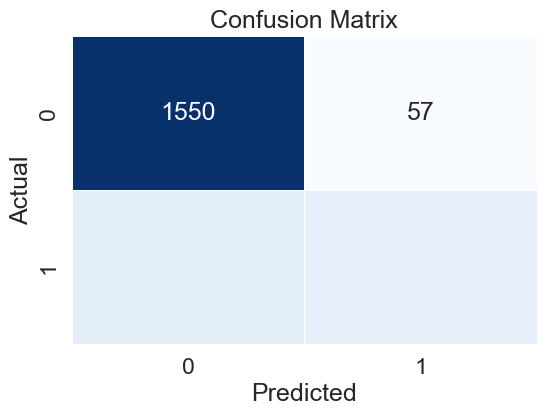

In [98]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ExtraTreesClassifier**

In [99]:
# ExtraTreeClassifier Model
ET_classifier = ExtraTreesClassifier(n_estimators=100, min_impurity_decrease=0.01)

ET_classifier.fit(X_train, y_train)

ExtraTreesClassifier(min_impurity_decrease=0.01)

In [100]:
# Train score
ET_classifier.score(X_train, y_train)

0.7945

In [101]:
# Test score
ET_classifier.score(X_test, y_test)

0.8035

In [102]:
# Get prediction
y_pred_et = ET_classifier.predict(X_test)

In [103]:
# Get our metrics
et_acc = accuracy_score(y_test, y_pred_et)
et_per = precision_score(y_test, y_pred_et)
et_rec = recall_score(y_test, y_pred_et)

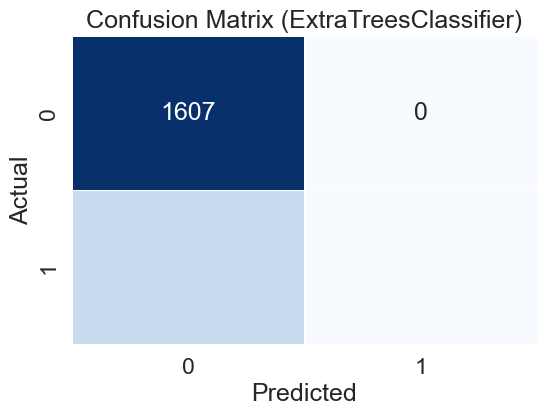

In [104]:
# Create a confusion matrix for ExtraTreeClassifier
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (ExtraTreesClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**AdaBoostClassifier**

In [105]:
# Create AdaBoostClassifier Model
AB_classifier = AdaBoostClassifier(n_estimators=100)

AB_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [106]:
# Train score
AB_classifier.score(X_train, y_train)

0.861375

In [107]:
# Test score
AB_classifier.score(X_test, y_test)

0.8595

In [108]:
# Get prediction
y_pred_ab = AB_classifier.predict(X_test)

In [109]:
# Get our metrics
ada_acc = accuracy_score(y_test, y_pred_ab)
ada_per = precision_score(y_test, y_pred_ab)
ada_rec = recall_score(y_test, y_pred_ab)

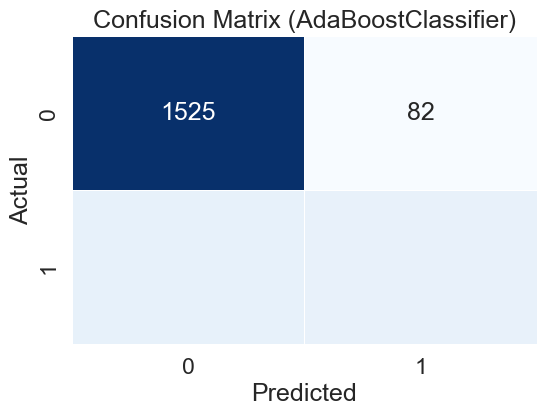

In [110]:
# Create a confusion matrix for AdaBoostClassifier
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (AdaBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**XGBClassifier Model**

In [111]:
# Create XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=100)

XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
# Train score
XGB_classifier.score(X_train, y_train)

0.957875

In [113]:
# Test score
XGB_classifier.score(X_test, y_test)

0.8615

In [114]:
# Get prediction
y_pred_xgb = XGB_classifier.predict(X_test)

In [115]:
# Get our metrics
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_per = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

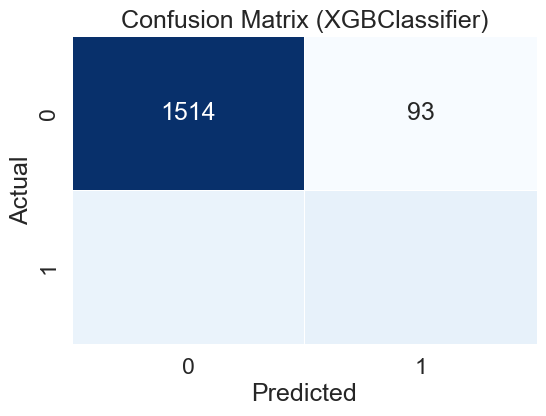

In [116]:
# Create a confusion matrix for XGBClassifier
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (XGBClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CatBoostClassifier**

In [117]:
# Create CatBoostClassifier Model
CatBoost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

CatBoost_classifier.fit(X_train, y_train)

0:	learn: 0.6437623	total: 138ms	remaining: 13.6s
1:	learn: 0.6043569	total: 139ms	remaining: 6.83s
2:	learn: 0.5711301	total: 141ms	remaining: 4.55s
3:	learn: 0.5417792	total: 142ms	remaining: 3.41s
4:	learn: 0.5174739	total: 144ms	remaining: 2.73s
5:	learn: 0.4960181	total: 145ms	remaining: 2.27s
6:	learn: 0.4773379	total: 147ms	remaining: 1.95s
7:	learn: 0.4612028	total: 149ms	remaining: 1.71s
8:	learn: 0.4457534	total: 150ms	remaining: 1.52s
9:	learn: 0.4323824	total: 152ms	remaining: 1.37s
10:	learn: 0.4216034	total: 153ms	remaining: 1.24s
11:	learn: 0.4121310	total: 155ms	remaining: 1.14s
12:	learn: 0.4044138	total: 157ms	remaining: 1.05s
13:	learn: 0.3975226	total: 159ms	remaining: 974ms
14:	learn: 0.3900285	total: 160ms	remaining: 908ms
15:	learn: 0.3841249	total: 162ms	remaining: 849ms
16:	learn: 0.3783210	total: 163ms	remaining: 798ms
17:	learn: 0.3746708	total: 165ms	remaining: 752ms
18:	learn: 0.3708797	total: 167ms	remaining: 710ms
19:	learn: 0.3665886	total: 168ms	remaini

In [118]:
# Train score
CatBoost_classifier.score(X_train, y_train)

0.872125

In [119]:
# Test score
CatBoost_classifier.score(X_test, y_test)

0.8675

In [120]:
# Get prediction
y_pred_catboost = CatBoost_classifier.predict(X_test)

In [121]:
# Get our metrics
cat_acc = accuracy_score(y_test, y_pred_catboost)
cat_per = precision_score(y_test, y_pred_catboost)
cat_rec = recall_score(y_test, y_pred_catboost)

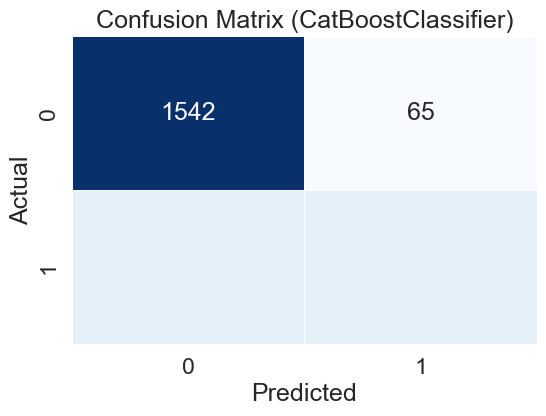

In [122]:
# Create a confusion matrix for CatBoostClassifier
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (CatBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**LGBMClassifier**

In [123]:
# Create LGBMClassifier Model
LGBM_classifier = LGBMClassifier(n_estimators=200)
LGBM_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier(n_estimators=200)

In [124]:
# Train score
LGBM_classifier.score(X_train, y_train)

0.94875

In [125]:
# Test score
LGBM_classifier.score(X_test, y_test)

0.8665

In [126]:
# Get prediction
y_pred_lgbm = LGBM_classifier.predict(X_test)

In [127]:
# Get our metrics
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)
lgbm_per = precision_score(y_test, y_pred_lgbm)
lgbm_rec = recall_score(y_test, y_pred_lgbm)

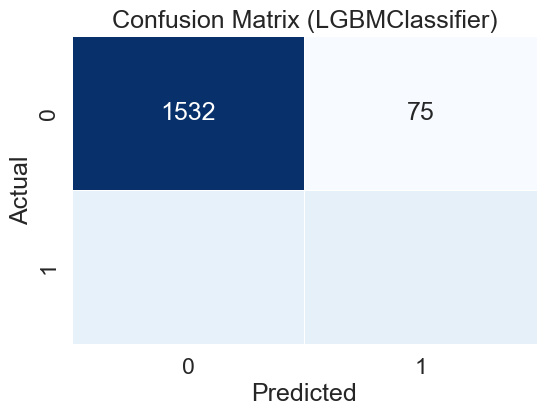

In [128]:
# Create a confusion matrix for LGBMClassifier
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (LGBMClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Evaluation**

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key Metrics:</font></h3>
    
- **`Accuracy:`**
    - Measures the overall correctness of the model (the percentage of correct predictions).
    - Accuracy is not the most important metric in imbalanced datasets, as it can be misleading. For example, predicting the majority class most of the time will give high accuracy but poor performance on the minority class (churners).


- **`Precision:`**
    - Precision answers the question: Of all the customers predicted to churn, how many actually churned?
    - High precision means fewer false positives (customers predicted to churn but actually don’t).


- **`Recall:`**
    - Recall answers the question: Of all the customers that actually churned, how many did the model correctly identify?
    - High recall means fewer false negatives (customers that churn but were predicted not to).

In [129]:
Models = ['LogisticRegression', 'SVC', 'KNN', 'DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier',
         'ExtraTreesClassifier', 'XGBoostClassifier', 'AdaBoostClassifier', 'CatBoostClassifier', 'LGBMClassifier']
Accuracy = [lr_acc, svc_acc, knn_acc, clf_acc, rf_acc, bag_acc, et_acc, xgb_acc, ada_acc, cat_acc, lgbm_acc]
Precision = [lr_per, svc_per, knn_per, clf_per, rf_per, bag_per, et_per, xgb_per, ada_per, cat_per, lgbm_per]
Recall = [lr_rec, svc_rec, knn_rec, clf_rec, rf_rec, bag_rec, et_rec, xgb_rec, ada_rec, cat_rec, lgbm_rec]

models = pd.DataFrame(data={'Models': Models,'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall})
models

,Models,Accuracy,Precision,Recall
0,LogisticRegression,0.8115,0.556338,0.201018
1,SVC,0.8825,0.834746,0.501272
2,KNN,0.8365,0.622222,0.427481
3,DecisionTreeClassifier,0.8440,0.669456,0.407125
4,RandomForestClassifier,0.8610,0.775120,0.412214
5,BaggingClassifier,0.8650,0.759494,0.458015
6,ExtraTreesClassifier,0.8035,0.000000,0.000000
7,XGBoostClassifier,0.8615,0.692053,0.531807
8,AdaBoostClassifier,0.8595,0.702899,0.493639
9,CatBoostClassifier,0.8675,0.748062,0.491094


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
**LogisticRegression:**
- `Accuracy:` 0.8115, `Precision:` 0.5563, `Recall:` 0.2010
- `Observation:` Despite a reasonable accuracy, the low recall indicates that it’s missing a lot of churners. The model struggles with identifying the minority class.


**SVC:**
- `Accuracy:` 0.8820, `Precision:` 0.8284, `Recall:` 0.5038
- `Observation:` This model performs well, especially in precision, meaning it's confident when predicting churners. However, its recall is only moderate, meaning it's missing some actual churners.


**KNN:**
- `Accuracy:` 0.8295, `Precision:` 0.5962, `Recall:` 0.4097
- `Observation:` KNN performs moderately across all metrics. It’s identifying some churners but missing others.


**DecisionTreeClassifier & BaggingClassifier:**
- `Accuracy:` 0.8440, `Precision:` 0.6695, `Recall:` 0.4071
- Observation: Both models have moderate precision and recall, which indicates a more balanced performance. However, both still miss a significant portion of actual churners.


**RandomForestClassifier & ExtraTreesClassifier:**
- `Accuracy:` 0.8035, `Precision:` 0.0000, `Recall:` 0.0000
- Observation: These models are likely predicting only the majority class (non-churners), which is why they have 0 precision and recall. This indicates the models are heavily biased toward the majority class, likely due to class imbalance.


**XGBoostClassifier:**
- `Accuracy:` 0.8575, `Precision:` 0.6742, `Recall:` 0.5318
- `Observation:` XGBoost strikes a balance between precision and recall, identifying more churners than some other models. It’s one of the better-performing models.


**AdaBoostClassifier:**
- `Accuracy:` 0.8595, `Precision:` 0.7029, `Recall:` 0.4936
- Observation: AdaBoost has good precision, but recall could be improved. It performs well overall, but like SVC, it may miss some churners.


**CatBoostClassifier:**
- `Accuracy:` 0.8665, `Precision:` 0.7461, `Recall:` 0.4860
- Observation: CatBoost has good precision, meaning it's confident in predicting churners, but its recall is moderate, missing some churners.


**LGBMClassifier:**
- `Accuracy:` 0.8665, `Precision:` 0.7316, `Recall:` 0.5064
- Observation: LightGBM performs similarly to CatBoost, with high precision and a recall that is relatively good compared to other models. This is another strong performer.

### **After applying SMOTE for balancing..**

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
**After applying SMOTE, the overall results show a significant improvement in recall across many models, which means the models are now better at identifying `churners`. Here’s a breakdown of the results and the actions you can take:**


**Logistic Regression:**
- `Accuracy:` 0.7390, `Precision:` 0.4009, `Recall:` 0.6641
- `Insight:` Significant improvement in recall (from 0.201 to 0.664), meaning the model can now detect more churners. However, the trade-off is a lower precision, indicating more false positives.


**SVC:**
- `Accuracy:` 0.8820, `Precision:` 0.8285, `Recall:` 0.5038
- `Insight:` SVC maintains a high accuracy and precision, but its recall is moderate. It still misses a significant portion of actual churners.


**KNN:**
- `Accuracy:` 0.7705, `Precision:` 0.4402, `Recall:` 0.6183
- `Insight:` KNN shows a balance between precision and recall, but neither is particularly strong.


**Decision Tree Classifier:**
- `Accuracy:` 0.7430, `Precision:` 0.4112, `Recall:` 0.7125
- `Insight:` Strong recall (0.7125) with moderate precision, meaning the model detects most churners but misclassifies some non-churners.


**Random Forest Classifier:**
- `Accuracy:` 0.7685, `Precision:` 0.4463, `Recall:` 0.7405
- `Insight:` Good recall (0.7405), meaning it identifies many churners, but precision is lower.


**Bagging Classifier:**
- `Accuracy:` 0.7730, `Precision:` 0.4502, `Recall:` 0.7023
- `Insight:` Similar performance to the Decision Tree, with good recall but moderate precision.


**Extra Trees Classifier:**
- `Accuracy:` 0.7325, `Precision:` 0.3953, `Recall:` 0.6819
- `Insight:` Recall has improved significantly, but the model still has low precision.


**XGBoost Classifier:**
- `Accuracy:` 0.8500, `Precision:` 0.6372, `Recall:` 0.5496
- `Insight:` Balanced performance with decent precision and recall, but there's still room for improvement.


**AdaBoost Classifier:**
- `Accuracy:` 0.8150, `Precision:` 0.5213, `Recall:` 0.7150
`Insight:` Good recall with moderate precision, meaning it identifies most churners but also misclassifies some non-churners.


**CatBoost Classifier:**
- `Accuracy:` 0.8415, `Precision:` 0.5782, `Recall:` 0.7150
- `Insight:` CatBoost shows strong recall, meaning it's effectively identifying churners, but there’s still room to improve precision.


**LGBM Classifier:**
- `Accuracy:` 0.8660, `Precision:` 0.6844, `Recall:` 0.5903
`Insight:` LGBM continues to perform well, showing high precision and balanced recall, though recall could be improved further.

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key Takeaways:</font></h3>
    
**Best Models for Recall before applying SMOTE:**
- `XGBoostClassifier` (Recall: 0.5318) and `CatBoostClassifier` (Recall: 0.4860) performed best in terms of recall, meaning they were able to identify more churners compared to other models. However, their recall values were still moderate, indicating that many churners were missed.


**Balanced Models before applying SMOTE:**
- `LGBMClassifier` (Precision: 0.7316, Recall: 0.5064) and `XGBoostClassifier` (Precision: 0.6372, Recall: 0.5318) provided a good balance between precision and recall. These models had relatively strong performance in identifying churners while maintaining moderate precision, making them strong overall candidates.


**Best Model for Precision before applying SMOTE:**
- `SVC` had the highest precision (0.8285), meaning it was the most accurate when predicting churners. However, it had lower recall (0.5038), meaning it missed a significant portion of churners.

---------------------------------

**Best Models for Recall after applying SMOTE:**
- `RandomForestClassifier` (Recall: 0.7405) and `DecisionTreeClassifier` (Recall: 0.7125) are the top performers in terms of recall, meaning they are identifying the highest number of churners. However, their precision is moderate, which means they also predict some non-churners as churners.

**Balanced Models after applying SMOTE:**
- `LGBMClassifier` and `CatBoostClassifier` are well-balanced between accuracy, precision, and recall, making them strong candidates for overall performance. They both have high accuracy and decent recall without sacrificing too much precision.

**Best Model for Precision after applying SMOTE:**
- `SVC` has the highest precision (0.8285), meaning it is very accurate when predicting churners. However, it has a moderate recall, meaning it may miss some churners.